In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


1. Import Libraries in NLP

In [2]:
import pandas as pd
import numpy as np 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import keras 
import tensorflow
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.mplot3d import Axes3D
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

2024-04-03 07:21:53.929434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 07:21:53.929765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 07:21:54.143384: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2. Data Inspection

In [3]:
training = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

In [4]:
validation = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv')

Use variable training 

In [5]:
training.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [6]:
training.tail(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74671,9199,Nvidia,Positive,Let no elite go unnoticed... NVIDIA Highlights...
74672,9199,Nvidia,Positive,Let no elim go unnoticed.... NVIDIA Highlights...
74673,9199,Nvidia,Positive,Let a no information elim that go unnoticed......
74674,9199,Nvidia,Positive,<unk> my elim be no.... NVIDIA Highlights Pict...
74675,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


3. Check Missing Values

In [9]:
missing_values = training.isnull().sum()

In [10]:
missing_values

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

Data Cleaning

In [11]:
trainings = training.dropna()

In [12]:
trainings

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [18]:
trainings.shape

(73995, 4)

In [11]:
# Most Common Words

# Read the CSV file
data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

# Handle NaN values
data.dropna(inplace=True)  # Remove rows with NaN values

# Find the most common words
freq_dist = FreqDist(data)
most_common_words = freq_dist.most_common(3)

print("\nMost common words:")
for word, frequency in most_common_words:
    print("-", word, ":", frequency)


Most common words:
- 2401 : 1
- Borderlands : 1
- Positive : 1


In [15]:
import pandas as pd
import heapq

# Read the CSV file
data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

# Handle NaN values
data.dropna(inplace=True)

# Find the n largest sentences 
n_largest = 2

# Define a function to get sentence length 
def sentence_length(sentence):
    return len(sentence)

# Get the n-largest sentences based on character count
largest_sentences = heapq.nlargest(n_largest, data['im getting on borderlands and i will murder you all ,'], key=sentence_length) 

print("N largest sentences:")
for sentence in largest_sentences:
    print("-", sentence) 

N largest sentences:
- The event dedicated to Victory Day in the Great Patriotic War was held as part of the celebration of the 70th anniversary of Victory in the Great Patriotic War of 1941-1945, which was attended by veterans of the Great Patriotic War, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home front workers, home
- At the same time,

5. Summary Statistics

In [21]:
trainings.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [29]:
count_trainingstatistics = trainings['2401'].count()
print("Training Statistic Count in column 2401:", count_trainingstatistics)

Training Statistic Count in column 2401: 73995


In [30]:
mean_trainingstatistics = trainings['2401'].mean()
print("Training Statistic Mean in column 2401:", mean_trainingstatistics)

Training Statistic Mean in column 2401: 6430.3336847084265


In [31]:
min_trainingstatistics = trainings['2401'].min()
print("Training Statistic Min in column 2401:", min_trainingstatistics)

Training Statistic Min in column 2401: 1


In [26]:
max_trainingstatistics = trainings['2401'].max()
print("Training Statistic Max in column 2401:", max_trainingstatistics)

Training Statistic Max in column 2401: 13200


In [28]:
std_trainingstatistics = trainings['2401'].std()
print("Training Statistic Std in column 2401:", std_trainingstatistics)

Training Statistic Std in column 2401: 3737.6559315011873


6. Data Visualization

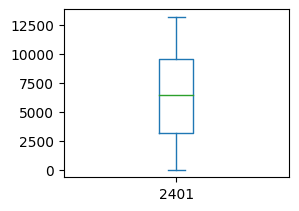

In [37]:
# box and whisker plots
trainings.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

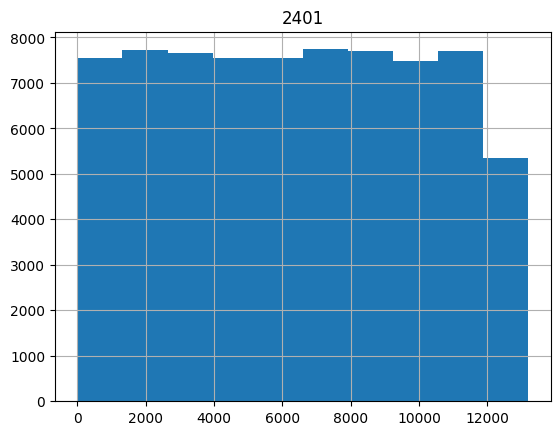

In [36]:
# histograms
trainings.hist()
plt.show()

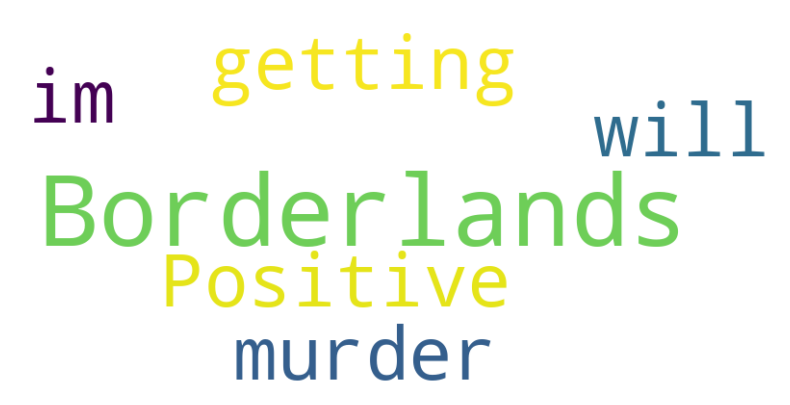

In [10]:
# WordCloud

filename = '/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv'
data = pd.read_csv(filename)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

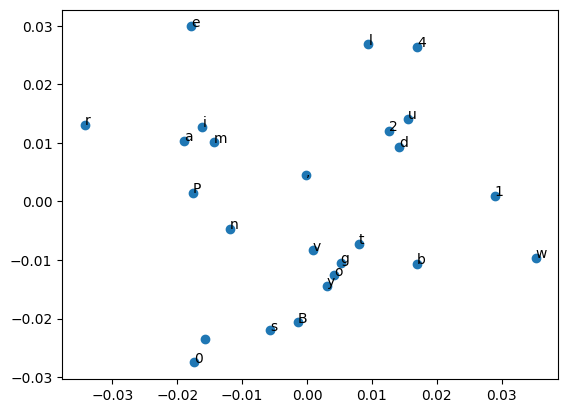

In [39]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Define training data
sentences = trainings.head(10)


# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors  # Correct way to access vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # Correct way to get vocabulary words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [41]:
trainings.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

7. Word Embeddings

In [42]:
# Tokenization and Lowercasing with NLTK
tokens = [word_tokenize(text.lower()) for text in trainings['im getting on borderlands and i will murder you all ,']]

In [43]:
# TF-IDF Vectorization

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(trainings['im getting on borderlands and i will murder you all ,'])

In [44]:
# Word2Vec Model
word2vec_model = Word2Vec(tokens, min_count=1)

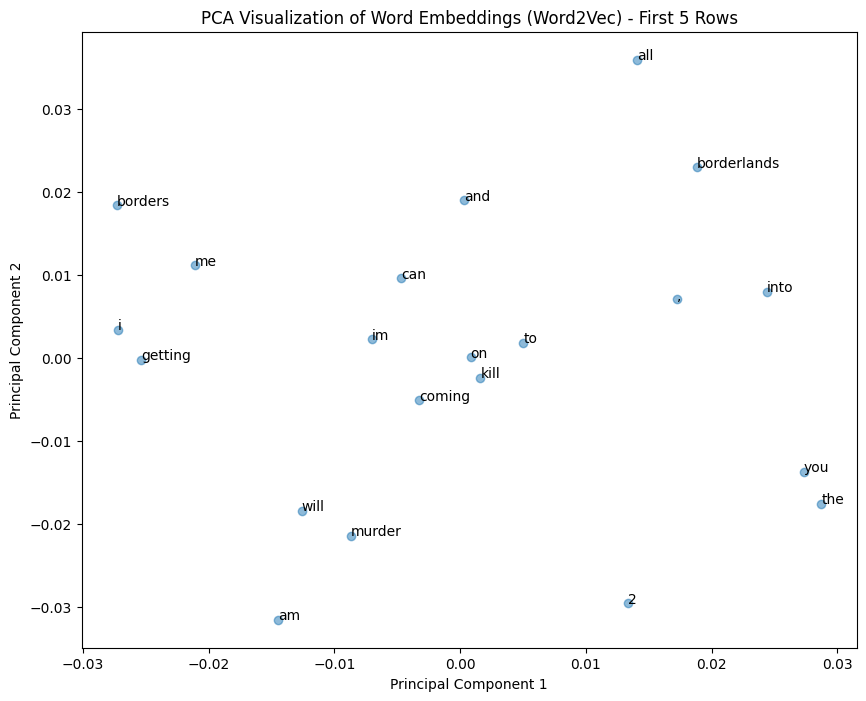

In [45]:
# Subset the first 5 rows of the data
subset_data = trainings.head(5)

# Tokenization and Lowercasing with NLTK for the subset
subset_tokens = [word_tokenize(text.lower()) for text in subset_data['im getting on borderlands and i will murder you all ,']]

# Word2Vec Model for the subset
subset_word2vec_model = Word2Vec(subset_tokens, min_count=1)

# Visualizing Word Embeddings with PCA for the subset
X_word2vec_subset = subset_word2vec_model.wv[subset_word2vec_model.wv.key_to_index]
pca = PCA(n_components=2)
result_word2vec_subset = pca.fit_transform(X_word2vec_subset)

plt.figure(figsize=(10, 8))
plt.scatter(result_word2vec_subset[:, 0], result_word2vec_subset[:, 1], alpha=0.5)
subset_words = list(subset_word2vec_model.wv.index_to_key)
for i, word in enumerate(subset_words):
    plt.annotate(word, xy=(result_word2vec_subset[i, 0], result_word2vec_subset[i, 1]))
plt.title('PCA Visualization of Word Embeddings (Word2Vec) - First 5 Rows')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

8. Bag Of Words

In [46]:
nltk.download('punkt') 

text = "I am coming to the borders and I will kill you all,"
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['I', 'am', 'coming', 'to', 'the', 'borders', 'and', 'I', 'will', 'kill', 'you', 'all', ',']


In [47]:
# Bag-of-Words Model For Columns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(trainings['im getting on borderlands and i will murder you all ,'])

# Displaying the feature names
vectorizer.get_feature_names_out()

array(['00', '000', '00011', ..., 'การออกอากาศของฉ', 'นจาก', 'ℐℓ٥'],
      dtype=object)

In [50]:
# Bag-of-Words Model For Columns

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(trainings['Positive'])

# Displaying the feature names
vectorizer.get_feature_names_out()

array(['irrelevant', 'negative', 'neutral', 'positive'], dtype=object)

9. Summarize Vocab

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["im getting on borderlands and i will kill you all,",
 "The borderlands",
 "The kill"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'im': 4, 'getting': 3, 'on': 6, 'borderlands': 2, 'and': 1, 'will': 8, 'kill': 5, 'you': 9, 'all': 0, 'the': 7}
[1.69314718 1.69314718 1.28768207 1.69314718 1.69314718 1.28768207
 1.69314718 1.28768207 1.69314718 1.69314718]
(1, 10)
[[0.35013871 0.35013871 0.26628951 0.35013871 0.35013871 0.26628951
  0.35013871 0.         0.35013871 0.35013871]]


10. Bag-of-Words with Keras

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text documents
docs = [
    "I am coming to the borders and I will kill you all,",
    "im getting on borderlands and i will kill you all,",
    "im coming on borderlands and i will murder you all,",
    "im getting on borderlands 2 and i will murder you me all,",
    "im getting into borderlands and i can murder you all,",
    "So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan ...",
    "So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderla...",
    "So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and..."
]

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")

# Fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)

# Examine what the tokenizer has learned
word_index = tokenizer.word_index
print(f"Word Index: {word_index}")

Word Index: {'<OOV>': 1, 'i': 2, 'you': 3, 'and': 4, 'borderlands': 5, 'a': 6, 'all': 7, 'will': 8, 'im': 9, 'getting': 10, 'on': 11, 'murder': 12, 'so': 13, 'spent': 14, 'hours': 15, 'something': 16, 'for': 17, 'fun': 18, 'if': 19, "don't": 20, 'know': 21, 'huge': 22, 'am': 23, 'coming': 24, 'kill': 25, 'few': 26, 'fan': 27, 'doing': 28, "i'm": 29, 'to': 30, 'the': 31, 'borders': 32, '2': 33, 'me': 34, 'into': 35, 'can': 36, 'making': 37, 'couple': 38, 'of': 39, 'that': 40, 'borderla': 41}


11. Summarize Documents

In [53]:
import keras

# Define 5 documents
docs = [
    'kill',
    'fun',
    'hour',
    'me',
    'you',
    'murder',
    'statisfying',
    'dissapointment',
    'all',
    'fun'
]

# Create the tokenizer
t = Tokenizer()  # Corrected by removing the incorrect argument

# Fit the tokenizer on the documents
t.fit_on_texts(docs)

# Summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

# Integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('kill', 1), ('fun', 2), ('hour', 1), ('me', 1), ('you', 1), ('murder', 1), ('statisfying', 1), ('dissapointment', 1), ('all', 1)])
10
{'fun': 1, 'kill': 2, 'hour': 3, 'me': 4, 'you': 5, 'murder': 6, 'statisfying': 7, 'dissapointment': 8, 'all': 9}
defaultdict(<class 'int'>, {'kill': 1, 'fun': 2, 'hour': 1, 'me': 1, 'you': 1, 'murder': 1, 'statisfying': 1, 'dissapointment': 1, 'all': 1})
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


12. Summarize Vocabulary

In [55]:
from gensim.models import Word2Vec

# Define training data
sentences = [
    ['I', 'am', 'coming', 'to', 'the', 'borders', 'and', 'I', 'will', 'kill', 'you', 'all,'],
    ['im', 'getting', 'on', 'borderlands', 'and', 'i', 'will', 'kill', 'you', 'all,'],
    ['that', 'was', 'the', 'first', 'borderlands', 'session', 'in', 'a', 'long', 'time', 'where', 'i', 'actually', 'had', 'a', 'really', 'satisfying', 'comba...'],
    ['The', 'biggest', 'disappointment', 'of', 'my', 'life', 'came', 'a', 'year', 'ago.'],
    ['WE', 'FINISHED', 'BORDERLANDS 3', 'FINALLY YAS!', 'Thank you', 'for', 'hanging', 'out', 'everyone!', 'It', 'was', 'fun.', 'I', 'will', 'try', 'to...'],
    
    # Tokenized new sentence added
    ['Guilty', 'of', 'sobriety!', 'A', 'bit', 'of', 'a', 'borderline.', 'I', 'was', 'called', 'to', 'work', 'early', 'tomorrow', 'so', 'I can"t', 'catch', 'up.']
]

# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Summarize the loaded model
print(model)

# Summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# Access vector for one word using the correct method
print(model.wv['I'])

Word2Vec<vocab=65, vector_size=100, alpha=0.025>
['I', 'a', 'of', 'was', 'will', 'kill', 'borderlands', 'all,', 'you', 'i', 'and', 'the', 'to', 'long', 'am', 'comba...', 'satisfying', 'really', 'had', 'actually', 'where', 'time', 'in', 'coming', 'borders', 'session', 'first', 'that', 'biggest', 'on', 'getting', 'im', 'The', 'up.', 'catch', 'fun.', 'I can"t', 'so', 'tomorrow', 'early', 'work', 'called', 'borderline.', 'bit', 'A', 'sobriety!', 'Guilty', 'to...', 'try', 'It', 'my', 'everyone!', 'out', 'hanging', 'for', 'Thank you', 'FINALLY YAS!', 'BORDERLANDS 3', 'FINISHED', 'WE', 'ago.', 'year', 'came', 'life', 'disappointment']
[-4.8514313e-04  2.9755878e-04  5.0569633e-03  9.0700649e-03
 -9.3663847e-03 -7.2399112e-03  6.5501477e-03  9.1506578e-03
 -5.0440445e-03 -4.0652421e-03  7.4472367e-03 -1.5988173e-03
 -4.5828097e-03  6.6381628e-03 -4.7717565e-03 -1.8137333e-03
  2.9617490e-03  9.5924450e-04 -8.3661694e-03 -9.4061969e-03
  7.4011679e-03  5.1165596e-03  6.8797036e-03  7.4227125e-0

13. Text Classification

In [65]:
# Load CSV data
filename = '/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv'
data = pd.read_csv(filename)

# Preprocess text (using NLTK for word tokenization)
data['tokenized_text'] = data['Positive'].apply(nltk.word_tokenize)

# Join tokenized words into sentences
data['text'] = data['tokenized_text'].apply(' '.join)

# Create vocabulary and sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
word_index = tokenizer.word_index

def text_to_sequence(text, word_index):
    return [word_index.get(word, 0) for word in text]

sequences = data['tokenized_text'].apply(lambda x: text_to_sequence(x, word_index))

# Pad sequences
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [69]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.sequence import pad_sequences

le = LabelEncoder()
data['target'] = le.fit_transform(data['Positive'])

# Define problem
vocab_size = len(word_index) + 1
max_length = 100

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8))  # Removed input_length parameter
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert 'padded_sequences' to numpy array
padded_sequences = np.array(padded_sequences)

model.fit(padded_sequences, data['target'], epochs=10, batch_size=32, validation_split=0.2)

# Summarize the model
print(model.summary())

Epoch 1/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2877 - loss: -12568.6777 - val_accuracy: 0.3515 - val_loss: -114267.8281
Epoch 2/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2879 - loss: -168017.4375 - val_accuracy: 0.3515 - val_loss: -395144.5000
Epoch 3/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2877 - loss: -469461.2500 - val_accuracy: 0.3515 - val_loss: -798996.7500
Epoch 4/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2892 - loss: -894241.0000 - val_accuracy: 0.3515 - val_loss: -1314361.5000
Epoch 5/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2862 - loss: -1392082.7500 - val_accuracy: 0.3515 - val_loss: -1939335.6250
Epoch 6/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2876 - loss: -2026584.1250 - val_accuracy: 0.3515 - val_loss: -2669429.7500
Epoch 7/10
1867/1867 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2866 - loss: -2756114.2500 - val_accuracy: 0.3515 - val_loss: -3504105.0000


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (32, 100, 8)           │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 800)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 1)                │           801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,525 (9.87 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,684 (6.58 KB)

None


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Read the CSV file
data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

# Handle NaN values
data.dropna(inplace=True)  # Remove rows with NaN values

# If column names are different, please adjust accordingly
X = data['Positive']
y = data['Positive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict labels for the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00      2624
    Negative       1.00      1.00      1.00      4463
     Neutral       1.00      1.00      1.00      3589
    Positive       1.00      1.00      1.00      4123

    accuracy                           1.00     14799
   macro avg       1.00      1.00      1.00     14799
weighted avg       1.00      1.00      1.00     14799



14. Sentiment Analysis

In [5]:
import pandas as pd
from textblob import TextBlob

# Read the CSV file
data = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv')

# Handle NaN values if necessary
data.dropna(subset=['Positive'], inplace=True)

# Calculating sentiment polarity for each review
data['Sentiment'] = data['Positive'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Displaying the DataFrame with the sentiment column
print(data)

       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  Sentiment  
0      I am coming to the borders and I will kill you...      0.227273  
1      im getting on borderlands and i will kill you ...      0.227273  
2      im coming on borderlands and i will murder you...      0.227273  
3      im getting on borderlands 2 and i will murder ...      0.227273  
4      im getting into borderlands and i can murder y...      0.227273  
...                                                  ...           ...  
74676  Just realized that the Wi